<h1>1. Business Problem</h1>

# 2.  Data Analysis

**Data Visualization**

Exploring high dimensional data by mapping it to a a new two dimensional plane is another important visualization techniuqe used commonly in machine learning.
The dimensionality reduction can be made in two different ways:
1. Feature Selection : By only keeping the most relevant variables from the original dataset (this technique is called feature selection).
2. Dimension Reduction: By exploiting the redundancy of the input data and by finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables.Principal Component Analysis and tSNE are two popular methods used based on this principle.

**Principal Component Analysis(PCA)**
The principal componets are less interepretable and dont have real meaning as they are constructed as linear combinatoins of the initial variables.Geometrically, they represent the directions of data that explain a maximal amount of variance. , thus capturing a most information of data.
Mathematically, the eigenvetors of the covariance matrix (of the features) are the directions of the axes where there is most variance and that we call Principal COmponents and their corresponding eigenvalues gives the amount of variance in each Principal COmponent. 
The compoents are selceted such that the first one has he maximum variance followed by the others in descneding order. 

**tSNE:**
t-distributed stochastic neighbor embedding (t-SNE) is a non linear, statistical method for visualizing high-dimensional data.  It works by embedding each datapoint from the high dimension space to two or three-dimensional map in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

The t-SNE algorithm comprises two main stages. 
    1. t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability.
    2.tSNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the KL divergence between the two distributions with respect to the locations of the points in the map. 
Perplexity a hyperparameter, is in a sense, a guess about number of close neigbors each point has. A typical value of 5 - 50 has been obseved to a give a robust perfomance.

Projecting the 30-dimensional data to 2D


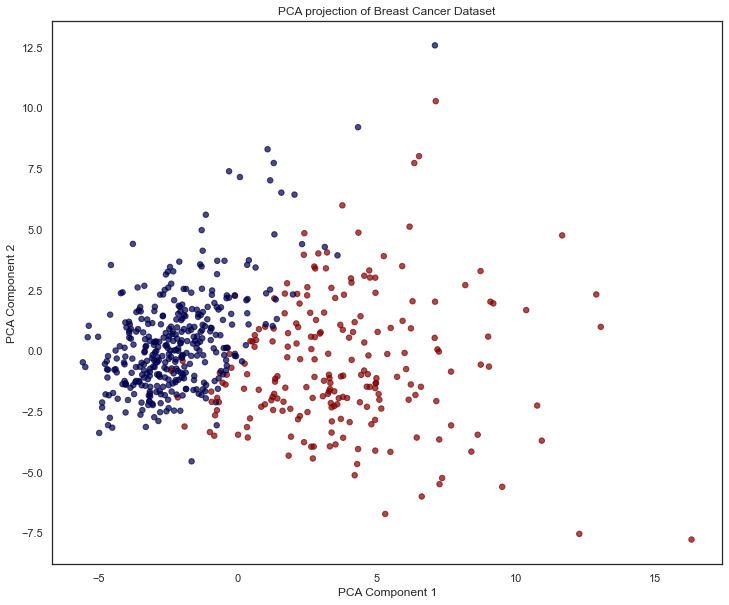

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(['diagnosis','id'], axis=1) #features
y = df['diagnosis']

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting the 30-dimensional data to 2D')

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=30, cmap = 'seismic');
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA projection of Breast Cancer Dataset');

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.945763
[t-SNE] KL divergence after 500 iterations: 1.012639


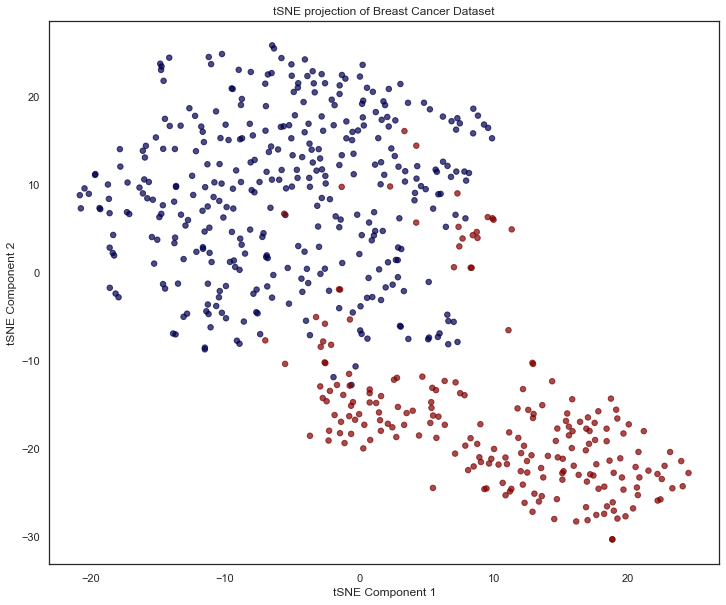

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = df.drop(['diagnosis','id'], axis=1) #features
y = df['diagnosis']

X_scaled = StandardScaler().fit_transform(X)

tSNE = TSNE(n_components=2, verbose = 1, perplexity = 30, n_iter=500) #default perplecxity = 30, n-iteratiosn = 1000. 
#simlar output seen for perplixity 40, 50, #robust results seen in values 5 5-50 as per the original research paper
tSNE_results = tSNE.fit_transform(X_scaled)

#PLOTTING
plt.figure(figsize=(12,10))
plt.scatter(tSNE_results[:, 0], tSNE_results[:, 1], c=df['diagnosis'], alpha=0.7, s=30, cmap = 'seismic');
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.title('tSNE projection of Breast Cancer Dataset');